# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

import sys


from data_wrangling import general_utils, specific_utils, process_monkey_information, base_processing_class, retrieve_raw_data, further_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_utils, plot_cluster_replacement
from decision_making_analysis.decision_making import decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_utils
from visualization.animation import animation_func, animation_utils, animation_class
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from reinforcement_learning.base_classes import env_utils, base_env, more_envs, rl_base_class, rl_base_utils
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, intended_targets_classes

import os, sys
import numpy as np
import matplotlib
from matplotlib import rc, cm
import matplotlib.pyplot as plt
import torch.nn as nn
from os.path import exists
import pandas as pd
from IPython.display import HTML
import matplotlib.ticker as ticker
from matplotlib import animation
from functools import partial
from math import pi
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from math import pi
from scipy.ndimage import gaussian_filter1d
from importlib import reload

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101



Set up logging configuration.


/opt/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# Basic data

## Plotting kwargs

In [2]:
trial_total_num = 2
PLAYER = "monkey"

classic_plot_kwargs = {'player': PLAYER,
                       'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True,
                       'show_eye_positions': True,
                       'show_eye_positions_on_the_right': True,
                       'show_connect_path_eye_positions': True,
                       #=== below is different from animation_plot_kwargs
                       'hitting_arena_edge_ok': False,
                       'trial_too_short_ok': False}

combined_plot_kwargs = {'player': PLAYER,
                        'combined_plot': True,
                        'show_alive_fireflies': False,
                        'show_title': False,
                        'show_start': False}

plot_chunks_kwargs = {'player': PLAYER,
                      'show_stops': True,
                      'show_believed_target_positions': True,
                      'show_reward_boundary': True,
                      'show_scale_bar': True,
                      'hitting_arena_edge_ok': True,
                      'trial_too_short_ok': True,
                      'show_connect_path_ff': True,
                      'trail_color_var': 'abs_ddw',
                      'show_colorbar': True}


plot_polar_kwargs = {'rmax': 400,
                    'show_visible_ff': True,
                    'hitting_arena_edge_ok': True,
                    'return_axes': True,
                    'colors_show_overall_time': True,
                    'show_ff_in_memory': True,
                    'show_target_at_being_caught': True
}

print("player is", PLAYER)

animation_plot_kwargs = classic_plot_kwargs.copy()
animation_plot_kwargs['as_part_of_animation'] = True
animation_plot_kwargs['show_eye_positions_on_the_right'] = False   
animation_plot_kwargs['hitting_arena_edge_ok'] = True
animation_plot_kwargs['trial_too_short_ok'] = True
animation_plot_kwargs['images_dir'] = None

player is monkey


## Retrieve monkey data

In [3]:
PLAYER = "monkey"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
data_item = animation_class.AnimationClass(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
data_item.make_PlotTrials_args()
data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)

monkey_information = data_item.monkey_information
ff_dataframe = data_item.ff_dataframe

ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted
cluster_around_target_indices = data_item.cluster_around_target_indices
ff_caught_T_new = data_item.ff_caught_T_new
caught_ff_num = len(ff_caught_T_new)
ff_flash_sorted = data_item.ff_flash_sorted
ff_flash_end_sorted = data_item.ff_flash_end_sorted
max_point_index = data_item.max_point_index
min_point_index = data_item.min_point_index






# data_item.make_or_retrieve_all_trial_patterns(exists_ok=True)
# data_item.make_or_retrieve_pattern_frequencies(exists_ok=True)
# data_item.make_or_retrieve_all_trial_features(exists_ok=True)
# data_item.make_or_retrieve_feature_statistics(exists_ok=True)
# data_item.make_info_of_monkey()
# data_item.make_or_retrieve_target_closest()
# data_item.make_or_retrieve_target_angle_smallest()



# target_closest = data_item.target_closest
# target_angle_smallest = data_item.target_angle_smallest
# all_trial_patterns = data_item.all_trial_patterns
# all_trial_features = data_item.all_trial_features
# pattern_frequencies = data_item.pattern_frequencies
# feature_statistics = data_item.feature_statistics




# info_of_monkey = data_item.info_of_monkey
# max_point_index = data_item.max_point_index
# min_point_index = data_item.min_point_index

# data_item.make_PlotTrials_args()
# data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)



Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_dataframe.h5
Retrieved target_clust_df_short
32 out of 1257 target clusters were not last seen within 10 seconds.They are filtered out when finding the trials that are "visible before last one".
24 out of 1225 target were captured within 0.1 seconds from the previous capture. They are filtered out when finding the trials that are "visible before last one" because the monkey might have just captured two ff together.
75 out of 1201 target clusters were seen at least 0.1 seconds before the previous capture, which is 6.24%
before calling deal_with_duplicated_stop_point_index, len(GUAT_w_ff_df) 142
after calling deal_with_duplicated_stop_point_index, len(GUAT_w_ff_df) 142


## Plotting args

In [ ]:
PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)


plot_polar_args = (monkey_information,
                    ff_dataframe, 
                    ff_life_sorted,
                    ff_real_position_sorted,
                    ff_caught_T_new,
                    ff_flash_sorted,)

In [ ]:
# chunk_numbers = range(20, 30)
# additional_kwargs = {'show_connect_path_ff_memory': True,
#                      'show_connect_path_ff_except_targets': True,
#                      'show_path_when_target_visible': True,
#                      'show_connect_path_eye_positions': False}
# data_item.make_animation_of_chunks(points_w_more_than_2_ff, monkey_information, chunk_numbers = chunk_numbers, sampling_frame_ratio = 3, additional_kwargs=additional_kwargs, exists_ok=True)

# Retrieve data

## Basic parameters

In [ ]:
NEW_DATASET = False
MONKEY_DATA = True
NO_PLOT_NEEDED = True
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
data_folder_name = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330/processed_data"



#data_num = 19


# # for agent
# PLAYER = "agent"
# NEW_DATASET = True
# MONKEY_DATA = False
# NO_PLOT_NEEDED = True
# data_folder_name = "RL_models/LSTM_July_29"
# data_num = 721
# trial_total_num = 2

## Which players to use?

In [ ]:
use_LSTM = False
use_SB3 = False
use_monkey = True

## SB3 agent data

In [ ]:
model_folder_name = "RL_models/SB3_stored_models/all_agents/Aug_10_3"
retrieve_dir = "RL_models/SB3_stored_models/all_agents/Aug_10_3"

In [ ]:
# !pip install wheel==0.38.4
# !pip3 install setuptools==65.5.0
# !pip install stable_baselines3

In [ ]:
from stable_baselines3 import SAC

env_kwargs = {"v_noise_std": 0.2, 
              "w_noise_std": 0.2,
              "ffr_noise_scale": 4, 
              "num_obs_ff": 2,
              "full_memory": 3}

if use_SB3:

    PLAYER = "agent"

    model_folder_name = "RL_models/SB3_stored_models/all_agents/A0.2_O4_ff2_memory3/"
    data_folder_name = model_folder_name
    os.makedirs(model_folder_name, exist_ok=True)


    env = env.CollectInformation(**env_kwargs)
    env.reset()

    # For direct training
    sac_model = SAC("MlpPolicy", 
                env,
                gamma=0.995,
                learning_rate=0.0015,
                batch_size=1024,
                target_update_interval=50,
                buffer_size=1000000,
                learning_starts=10000,
                train_freq=10,
                ent_coef='auto',
                policy_kwargs=dict(activation_fn=nn.Tanh, net_arch=[128, 128])
                    )


    path = os.path.join(model_folder_name, 'best_model.zip')
    sac_model = sac_model.load(path, env=env)
    
    monkey_information, ff_flash_sorted, ff_caught_T_new, ff_believed_position_sorted, ff_real_position_sorted, \
        ff_life_sorted, ff_flash_end_sorted, caught_ff_num, total_ff_num, obs_ff_indices_in_ff_dataframe, sorted_indices_all, ff_in_obs_df \
        =collect_agent_data.collect_agent_data_func(env, sac_model, n_steps = 15000)

    ff_dataframe_args = (monkey_information, ff_caught_T_new, ff_flash_sorted,  ff_real_position_sorted, ff_life_sorted)
    ff_dataframe_kargs = {"max_distance": 400}
    ff_dataframe = make_ff_dataframe.make_ff_dataframe_func(*ff_dataframe_args, **ff_dataframe_kargs, player = "agent", 
                                     obs_ff_indices_in_ff_dataframe = obs_ff_indices_in_ff_dataframe, ff_in_obs_df = ff_in_obs_df)
    min_point_index, max_point_index = np.min(np.array(ff_dataframe['point_index'])), np.max(np.array(ff_dataframe['point_index']))

    filepath = data_folder_name + '/patterns_and_features/all_trial_features.csv'
    if (PLAYER == "monkey") & (exists(filepath)):
        all_trial_features = pd.read_csv(filepath)
    else:
        all_trial_features = organize_patterns_and_features.make_all_trial_features(ff_dataframe, monkey_information, ff_caught_T_new, cluster_around_target_indices, ff_real_position_sorted, ff_believed_position_sorted,  data_folder_name = data_folder_name)



## LSTM agent data

In [ ]:
if use_LSTM:
      
    from LSTM_agent_params import *
    PLAYER = "agent"

    model_folder_name = "RL_models/LSTM_stored_models/all_agents/LSTM_Aug_1_24"
    data_folder_name = model_folder_name
    os.makedirs(model_folder_name, exist_ok=True)


    replay_buffer_size=100
    replay_buffer = lstm_utils.ReplayBufferLSTM2(replay_buffer_size)
    sac_model=lstm_utils.LSTM_SAC_Trainer(replay_buffer, state_space, action_space, hidden_dim=hidden_dim, action_range=action_range,\
                          gamma = gamma, soft_q_lr = soft_q_lr, policy_lr = policy_lr, alpha_lr = alpha_lr, \
                          batch_size = batch_size, update_itr = update_itr, reward_scale = reward_scale, \
                          target_entropy = target_entropy, soft_tau = soft_tau, train_freq = train_freq, device = device)


    # Load agent
    sac_model.load_model(model_folder_name)

    env = env.CollectInformationLSTM()
    env.flash_on_interval = 0.3
    env.distance2center_cost = 0
    sac_model.load_model(model_folder_name)



    monkey_information, ff_flash_sorted, ff_caught_T_new, ff_believed_position_sorted, \
              ff_real_position_sorted, ff_life_sorted, ff_flash_end_sorted, caught_ff_num, total_ff_num, \
              obs_ff_indices_in_ff_dataframe, sorted_indices_all \
              = collect_agent_data.collect_agent_data_func(env, sac_model, n_steps = 5000, LSTM = True, hidden_dim= hidden_dim, device = device, deterministic = False)

    ff_dataframe_args = (monkey_information, ff_caught_T_new, ff_flash_sorted,  ff_real_position_sorted, ff_life_sorted)
    ff_dataframe_kargs = {"max_distance": 400}
    ff_dataframe = make_ff_dataframe.make_ff_dataframe_func(*ff_dataframe_args, **ff_dataframe_kargs, player = "agent",  \
                                      obs_ff_indices_in_ff_dataframe = obs_ff_indices_in_ff_dataframe, ff_in_obs_df = ff_in_obs_df)
    min_point_index, max_point_index = np.min(np.array(ff_dataframe['point_index'])), np.max(np.array(ff_dataframe['point_index']))

    filepath = data_folder_name + '/patterns_and_features/all_trial_features.csv'
    if (PLAYER == "monkey") & (exists(filepath)):
        all_trial_features = pd.read_csv(filepath)
    else:
        all_trial_features = organize_patterns_and_features.make_all_trial_features(ff_dataframe, monkey_information, ff_caught_T_new, cluster_around_target_indices, ff_real_position_sorted, ff_believed_position_sorted,  data_folder_name = data_folder_name)



## Monkey data

In [ ]:
if use_monkey:

    PLAYER = "monkey"
    raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
    data_item = animation_class.AnimationClass(raw_data_folder_path=raw_data_folder_path)
    data_item.retrieve_or_make_monkey_data(exists_ok=True)
    data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
    data_item.find_patterns()
    data_item.make_PlotTrials_args()
    data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)


    monkey_information = data_item.monkey_information
    ff_dataframe = data_item.ff_dataframe
    min_point_index, max_point_index = np.min(np.array(ff_dataframe['point_index'])), np.max(np.array(ff_dataframe['point_index']))

    caught_ff_num = len(ff_caught_T_new)
    cluster_around_target_trials, _, cluster_around_target_indices, cluster_around_target_positions = pattern_by_trials.cluster_around_target_func(ff_dataframe, caught_ff_num, ff_caught_T_new, ff_real_position_sorted)


    info_of_monkey = {
            "monkey_information": monkey_information,
            "ff_dataframe": ff_dataframe,
            "ff_caught_T_new": ff_caught_T_new,
            "ff_real_position_sorted": ff_real_position_sorted,
            "ff_believed_position_sorted": ff_believed_position_sorted,
            "ff_life_sorted": ff_life_sorted,
            "ff_flash_sorted": ff_flash_sorted,
            "ff_flash_end_sorted": ff_flash_end_sorted,
            "cluster_around_target_indices": cluster_around_target_indices
    }


    filepath = data_folder_name + '/patterns_and_features/all_trial_features.csv'
    if (PLAYER == "monkey") & (exists(filepath)):
        all_trial_features = pd.read_csv(filepath)
    else:
        all_trial_features = organize_patterns_and_features.make_all_trial_features(ff_dataframe, monkey_information, ff_caught_T_new, cluster_around_target_indices, ff_real_position_sorted, ff_believed_position_sorted)

# Classic plots

In VScode, for animation to work successfully, HTML(data_instance.anim.to_html5_video())
has to be the last line of the code, and it can’t be within a for loop or if/else statement


## Visible before last one

In [ ]:
trial_total_num = 2

In [ ]:

num_trials = 1
category = data_item.visible_before_last_one_trials
category = category[category > num_trials]
category_name = 'visible_before_last_one'


if len(category) > 0:
    for currentTrial in category[:trial_total_num]:
        with general_utils.initiate_plot(7, 7, 100):
            duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]

            plot_trials.PlotTrials(duration, 
                        *PlotTrials_args,
                        **classic_plot_kwargs,
                        currentTrial = currentTrial,
                        num_trials = num_trials,                                  
                        show_connect_path_ff_except_targets = True,
                        show_path_when_target_visible = True,
                        )

            plt.show()  
            


temp_animation_plot_kwargs = animation_plot_kwargs.copy()
#temp_animation_plot_kwargs['show_connect_path_ff_except_targets'] = True
temp_animation_plot_kwargs['show_path_when_target_visible'] = True
data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None, dt=0.016)
HTML(data_item.anim.to_html5_video())




## Disappear latest

In [ ]:
num_trials = 1
category = data_item.disappear_latest_trials
category = category[category > num_trials]
category_name = 'disappear_latest'


if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
    for currentTrial in category[:trial_total_num]:
        duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]

        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,
                   show_connect_path_ff = True,
        )

        # temp_animation_plot_kwargs = animation_plot_kwargs.copy()
        # data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None)
        

        plt.show()  
        

## 2 in a row

In [ ]:
num_trials = 2 
category = data_item.two_in_a_row
category = category[category > num_trials]
#category = two_in_a_row_simuly
#category = two_in_a_row_non_simul
#category = used_cluster  --> two_in_a_row_non_simul ^ on_before_last_one
category_name = 'two_in_a_row'



if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
    for currentTrial in category[:trial_total_num]:
    #for currentTrial in [17, 45]:
        duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,                   
                   show_connect_path_ff_except_targets = True,
                   show_path_when_target_visible = True,
                   )
        
        temp_animation_plot_kwargs = animation_plot_kwargs.copy()   
        #temp_animation_plot_kwargs['show_connect_path_ff_except_targets'] = True
        temp_animation_plot_kwargs['show_path_when_target_visible'] = True     
        data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None)
        #HTML(.to_html5_video())
        plt.show()  
        
        data_item.anim

## Waste cluster around last target

In [ ]:
num_trials = 2
category = data_item.waste_cluster_around_target_trials
category = category[category > num_trials]
category_name = 'waste_cluster_around_target'



if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
    for currentTrial in category[:trial_total_num]:
        duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
        
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,
                   show_connect_path_ff = True,
                   trial_to_show_cluster_around_target = "previous",
                   )

        temp_animation_plot_kwargs = animation_plot_kwargs.copy()
        temp_animation_plot_kwargs['trial_to_show_cluster_around_target'] = "previous"
        data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None)
        

        plt.show()  
        

## Try a few times

In [ ]:
category = data_item.try_a_few_times_trials
category = category[category > num_trials]
category_name = 'try_a_few_times'
num_trials = 2


if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
    for currentTrial in category[:trial_total_num+5]:
        duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,
                   show_connect_path_ff = True,                
                   )

        plt.show()  
        
        
        temp_animation_plot_kwargs = animation_plot_kwargs.copy()
        data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None)
        


## Give up after trying

In [ ]:
category = data_item.give_up_after_trying_trials
category = category[category > num_trials]
category_name = 'give_up_after_trying'


num_trials = 2


if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
    for currentTrial in category[:trial_total_num]:
        duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,
                   show_connect_path_ff = True,
                   )
        

        plt.show()  
        

        temp_animation_plot_kwargs = animation_plot_kwargs.copy()
        data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None)
        

## Ignore sudden flash

In [ ]:
category = data_item.ignore_sudden_flash_trials
category = category[category > num_trials]
category_name = 'ignore_sudden_flash'

num_trials = 1

ignored_ff_target_pairs_index_only = data_item.ignored_ff_target_pairs[['ff_index']]

if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
    for currentTrial in category[:trial_total_num]:
        duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]

        ignored_ff_indices = np.array(ignored_ff_target_pairs_index_only.loc[currentTrial]).reshape(-1).tolist()

        plot_trials.PlotTrials(duration, 
                   *PlotTrials_args,
                   **classic_plot_kwargs,
                   currentTrial = currentTrial,
                   num_trials = num_trials,                   
                   show_connect_path_ff = True,
                   indices_of_ff_to_mark = ignored_ff_indices,             
                   )
        

        plt.show()  
        


        temp_animation_plot_kwargs = animation_plot_kwargs.copy()
        temp_animation_plot_kwargs['indices_of_ff_to_mark'] = ignored_ff_indices
        data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None)
        

### Relative locations of all the ignored ff

In [ ]:
import math
rmax = 55
print("Using ff_angle")

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_zero_location("N")
ax.set_rlabel_position(292.5)
ax.set_ylim(0, rmax)
# Draw the boundary of the monkey's vision (use width = np.pi*4/9 for 40 degrees of vision)
ax.bar(0, rmax, width=np.pi/2, bottom=0.0, color="grey", alpha=0.1)
plt.setp(ax, rorigin=0, rmin=0, rmax=rmax)   # rmax can be changed

# Change the labels for the angles 
labels = list(ax.get_xticks())
labels[5], labels[6], labels[7] = -labels[3], -labels[2], -labels[1]
labels_degrees = [str(int(math.degrees(label))) + chr(176) for label in labels]
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(labels_degrees)

# Plot the locations of the FFs
ax.scatter(data_item.ignored_ff_target_pairs['ff_angle'], data_item.ignored_ff_target_pairs['ff_distance'], marker='.', s=20, alpha=1)
plt.show()

In [ ]:
rmax = 55
print("Using ff_angle_boundary")

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_zero_location("N")
ax.set_rlabel_position(292.5)
ax.set_ylim(0, rmax)
# Draw the boundary of the monkey's vision (use width = np.pi*4/9 for 40 degrees of vision)
ax.bar(0, rmax, width=np.pi/2, bottom=0.0, color="grey", alpha=0.1)
plt.setp(ax, rorigin=0, rmin=0, rmax=rmax)   # rmax can be changed

# Change the labels for the angles 
labels = list(ax.get_xticks())
labels[5], labels[6], labels[7] = -labels[3], -labels[2], -labels[1]
labels_degrees = [str(int(math.degrees(label))) + chr(176) for label in labels]
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(labels_degrees)

# Plot the locations of the FFs
ax.scatter(data_item.ignored_ff_target_pairs['ff_angle_boundary'], data_item.ignored_ff_target_pairs['ff_distance'], marker='.', s=20, alpha=1)

plt.show()

# Subplots

## Visible before last one

In [ ]:
trial_total_num = 10
PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted,
                   ff_real_position_sorted, ff_believed_position_sorted,
                   cluster_around_target_indices, ff_caught_T_new)

category = data_item.visible_before_last_one_trials
subplots_kwargs = classic_plot_kwargs.copy()
subplots_kwargs['show_eye_positions'] = False
subplots_kwargs['show_eye_positions_on_the_right'] = False

num_trials = 2
if len(category) > 0:
    with general_utils.initiate_plot(10, 10, 100):
        fig = plt.figure(figsize=(10, 10), dpi=100)
        k = 1
        for currentTrial in category[:trial_total_num]:
            if (currentTrial >= len(ff_caught_T_new)) or (currentTrial < num_trials): 
                continue
            start = max(0, currentTrial - num_trials)
            duration = [ff_caught_T_new[start], ff_caught_T_new[currentTrial]]

            ax = fig.add_subplot(2, 2, k)
            info = plot_trials.PlotTrials(duration, *PlotTrials_args, **subplots_kwargs,
                                          currentTrial=currentTrial, num_trials=num_trials,
                                          fig=fig, axes=ax, subplots=True,
                                          show_connect_path_ff_except_targets=True,
                                          show_path_when_target_visible=True)
            if info.get('whether_plotted'):
                k += 1
                if k == 5:
                    break
            else:
                fig.delaxes(ax)

        plt.tight_layout()
        plt.show()


# Combined plots

## Visible before last one

In [ ]:
category = data_item.visible_before_last_one_trials
num_trials = 2
xmin, xmax, ymin, ymax = 0, 0, 0, 0             
if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)      
      for currentTrial in category[:50]:
          if (currentTrial >= len(ff_caught_T_new)) or (currentTrial < num_trials):
              continue
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          returned_info = plot_trials.PlotTrials(duration, 
                                                *PlotTrials_args,                                                          
                                                **combined_plot_kwargs,
                                                currentTrial = currentTrial,
                                                num_trials = num_trials,
                                                fig = fig,
                                                axes = axes,
                                                show_path_when_target_visible = True,
                                                hitting_arena_edge_ok = False,
                                                )
          if 'axes' in returned_info:
            axes = returned_info['axes']
            if returned_info['whether_plotted'] is True:
                x0, y0 = returned_info['cum_mxy_rotated'][0][0], returned_info['cum_mxy_rotated'][1][0]
                ff_believed_position_rotated = np.matmul(returned_info['rotation_matrix'], np.stack((ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[0], ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[1])))
                axes.scatter(ff_believed_position_rotated[0]-x0, ff_believed_position_rotated[1]-y0, s=40, alpha=0.85, zorder=5)
                xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, returned_info['cum_mxy_rotated'])

      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      

## Disappear latest

In [ ]:
category = data_item.disappear_latest_trials
num_trials = 1
xmin, xmax, ymin, ymax = 0, 0, 0, 0
               
if len(category) > 0:
  with general_utils.initiate_plot(10, 10, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)
      print("axes", axes)
      for currentTrial in category[:50]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          returned_info = plot_trials.PlotTrials(duration, 
                                                          *PlotTrials_args,   
                                                          **combined_plot_kwargs,
                                                          currentTrial = currentTrial,
                                                          num_trials = num_trials,
                                                          fig = fig,
                                                          axes = axes,
                                                          show_path_when_target_visible = True,
                                                          show_believed_target_positions = True,
                                                          hitting_arena_edge_ok = False,
                                                          )
          if 'axes' in returned_info:
            axes = returned_info['axes']
            if returned_info['whether_plotted'] is True:
                xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, returned_info['cum_mxy_rotated'])

      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      


## 2 in a row

In [ ]:
category = data_item.two_in_a_row
num_trials = 2
xmin, xmax, ymin, ymax = 0, 0, 0, 0
               
if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)
      for currentTrial in category[:50]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          returned_info = plot_trials.PlotTrials(duration, 
                                                          *PlotTrials_args,                                                          
                                                          **combined_plot_kwargs,
                                                          currentTrial = currentTrial,
                                                          num_trials = num_trials,
                                                          fig = fig,
                                                          axes = axes,
                                                          )
          axes = returned_info['axes']
          if returned_info['whether_plotted'] is True:
              x0, y0 = cum_mxy_rotated[0][0], cum_mxy_rotated[1][0]
              ff_believed_position_rotated = np.matmul(R, np.stack((ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[0], ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[1])))
              axes.scatter(ff_believed_position_rotated[0]-x0, ff_believed_position_rotated[1]-y0, s=40, alpha=0.85, zorder=5)
              xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, cum_mxy_rotated)

      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      

## Cluster around targets

In [ ]:
import random
category = cluster_around_target_trials
num_trials = 1
xmin, xmax, ymin, ymax = 0, 0, 0, 0
               
if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)
      for currentTrial in category[:50]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          returned_info = plot_trials.PlotTrials(duration, 
                                                          *PlotTrials_args,     
                                                          **combined_plot_kwargs,
                                                          currentTrial = currentTrial,
                                                          num_trials = num_trials,
                                                          fig = fig,
                                                          axes = axes,
                                                          show_trajectory = False
                                                          )
          axes = returned_info['axes']
          if returned_info['whether_plotted'] is True:
              x0, y0 = cum_mxy_rotated[0][0], cum_mxy_rotated[1][0]
              cluster_around_target_rotated = np.matmul(R, np.stack((cluster_around_target_positions[currentTrial].T[0], cluster_around_target_positions[currentTrial].T[1])))
              ff_believed_position_rotated = np.matmul(R, np.stack((ff_believed_position_sorted[currentTrial].T[0], ff_believed_position_sorted[currentTrial].T[1])))
              current_color = '#%06X' % random.randint(0, 0xFFFFFF)
              axes.scatter(cum_mxy_rotated[0]-x0, cum_mxy_rotated[1]-y0,marker = 'o',s = 2, alpha= 0.7, color = current_color)
              axes.scatter(cluster_around_target_rotated[0]-x0, cluster_around_target_rotated[1]-y0, marker='o', s=30, color = current_color) 
              axes.scatter(ff_believed_position_rotated[0]-x0, ff_believed_position_rotated[1]-y0, marker='o', s=30, color = current_color) 
              xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, cum_mxy_rotated)

      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      

## Waste cluster around last target

In [ ]:
category = data_item.waste_cluster_around_target_trials
num_trials = 2
xmin, xmax, ymin, ymax = 0, 0, 0, 0
               
if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)
      for currentTrial in category[:50]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          returned_info = plot_trials.PlotTrials(duration, 
                                                          *PlotTrials_args,
                                                          
                                                          **combined_plot_kwargs,
                                                          currentTrial = currentTrial,
                                                          num_trials = num_trials,
                                                          fig = fig,
                                                          axes = axes,
                                                          show_trajectory = False
                                                          )
          axes = returned_info['axes']
          if returned_info['whether_plotted'] is True:
              x0, y0 = cum_mxy_rotated[0][0], cum_mxy_rotated[1][0]
              cluster_around_target_rotated = np.matmul(R, np.stack((cluster_around_target_positions[currentTrial-1].T[0], cluster_around_target_positions[currentTrial-1].T[1])))
              ff_believed_position_rotated = np.matmul(R, np.stack((ff_believed_position_sorted[currentTrial-1].T[0], ff_believed_position_sorted[currentTrial-1].T[1])))
              current_color = '#%06X' % random.randint(0, 0xFFFFFF)
              axes.scatter(cum_mxy_rotated[0]-x0, cum_mxy_rotated[1]-y0,marker = 'o',s = 2, alpha= 0.7, color = current_color)
              axes.scatter(cluster_around_target_rotated[0]-x0, cluster_around_target_rotated[1]-y0, marker='o', s=30, color = current_color) 
              axes.scatter(ff_believed_position_rotated[0]-x0, ff_believed_position_rotated[1]-y0, marker='o', s=30, color = current_color) 
              xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, cum_mxy_rotated)

      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      

## Try a few times

In [ ]:
category = data_item.try_a_few_times_trials
num_trials = 1
xmin, xmax, ymin, ymax = 0, 0, 0, 0
               
if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)
      for currentTrial in category[20:30]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          returned_info = plot_trials.PlotTrials(duration, 
                                                          *PlotTrials_args,
                                                          
                                                          **combined_plot_kwargs,
                                                          currentTrial = currentTrial,
                                                          num_trials = num_trials,
                                                          fig = fig,
                                                          axes = axes,
                                                          show_believed_target_positions = True,
                                                          show_path_when_target_visible = True,
                                                          )
          axes = returned_info['axes']
          if returned_info['whether_plotted'] is True:
              x0, y0 = cum_mxy_rotated[0][0], cum_mxy_rotated[1][0]
              current_color = '#%06X' % random.randint(0, 0xFFFFFF)
              # Plot believed target positions
              ff_believed_position_rotated = np.matmul(R, np.stack((ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[0], ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[1])))
              axes.scatter(ff_believed_position_rotated[0]-x0, ff_believed_position_rotated[1]-y0, s=45, alpha=0.75, color=current_color, zorder=3) 
              # Plot stops
              cum_pos_index = np.where((monkey_information['time'] > duration[0]) & (monkey_information['time'] <= duration[1]))[0]
              zerospeed_index = np.where(monkey_information['monkey_speeddummy'].iloc[cum_pos_index]==0)[0]
              axes.scatter(cum_mxy_rotated[0][zerospeed_index]-x0, cum_mxy_rotated[1][zerospeed_index]-y0,marker = '*',s = 80, color = current_color, alpha=0.8, zorder=3)
              # Update the limits 
              xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, cum_mxy_rotated)


      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      

## Give up after trying

In [ ]:
category = data_item.give_up_after_trying_trials
num_trials = 1
xmin, xmax, ymin, ymax = 0, 0, 0, 0
               
if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)
      for currentTrial in category[:50]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          returned_info = plot_trials.PlotTrials(duration, 
                                                          *PlotTrials_args,
                                                          
                                                          **combined_plot_kwargs,
                                                          currentTrial = currentTrial,
                                                          num_trials = num_trials,
                                                          fig = fig,
                                                          axes = axes,
                                                          show_path_when_target_visible = True,
                                                          show_believed_target_positions = True,
                                                          show_stops = True
                                                          )
          axes = returned_info['axes']
          if returned_info['whether_plotted'] is True:
              xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, cum_mxy_rotated)

      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      

## Ignore sudden flash

In [ ]:
category = data_item.ignore_sudden_flash_trials
num_trials = 1
xmin, xmax, ymin, ymax = 0, 0, 0, 0
               
if len(category) > 0:
  with general_utils.initiate_plot(7, 7, 100):
      fig = plt.figure()
      axes = fig.add_subplot(111)
      for currentTrial in category[:30]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
          ignored_ff_indices = np.array(ignored_ff_target_pairs_index_only.loc[currentTrial]).reshape(-1).tolist()
          returned_info = plot_trials.PlotTrials(duration, 
                                                          *PlotTrials_args,
                                                          
                                                          **combined_plot_kwargs,
                                                          currentTrial = currentTrial,
                                                          num_trials = num_trials,
                                                          fig = fig,
                                                          axes = axes,
                                                          show_path_when_target_visible = True,
                                                          show_connect_path_ff_except_targets = True,
                                                          connect_path_ff_max_distance = 50,
                                                          show_believed_target_positions = True,
                                                          indices_of_ff_to_mark = ignored_ff_indices,   
                                                          )
          axes = returned_info['axes']
          if returned_info['whether_plotted'] is True:
              x0, y0 = cum_mxy_rotated[0][0], cum_mxy_rotated[1][0]
              ff_believed_position_rotated = np.matmul(R, np.stack((ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[0], ff_believed_position_sorted[currentTrial-num_trials+1:currentTrial+1].T[1])))
              #axes.scatter(ff_believed_position_rotated[0]-x0, ff_believed_position_rotated[1]-y0, s=40, alpha=0.85, zorder=5)
              xmin, ymin, xmax, ymax = plot_behaviors_utils.update_plot_limits(xmin, ymin, xmax, ymax, cum_mxy_rotated)

      axes.set_xlim((xmin-75, xmax+75))
      axes.set_ylim((ymin-25, ymax+75))
      axes.xaxis.set_major_locator(ticker.NullLocator())
      plt.show()  
      

# Polar plots

In [ ]:
num_trials = 1
for currentTrial in range(100, 105):
    print(currentTrial)
    #duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
    duration = [ff_caught_T_new[currentTrial]-1.25, ff_caught_T_new[currentTrial]]


    plot_polar.PlotPolar(duration,
              monkey_information,
              ff_dataframe, 
              ff_life_sorted,
              ff_real_position_sorted,
              ff_caught_T_new,
              ff_flash_sorted,
              rmax = 100,
              currentTrial = currentTrial,
              num_trials = num_trials,
              show_visible_ff = True,
              show_visible_target = True,
              # show_ff_in_memory = True,
              # show_target_in_memory = True,
              ff_colormap = 'viridis',
              target_colormap = 'viridis',
              show_alive_ff = True,
              colors_show_overall_time = True,
              show_all_positions_of_all_fireflies = True,
              show_colorbar = True,
                )

# Animation

## Overhead view

### prepare for animation

In [4]:
PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)

animation_plot_kwargs = classic_plot_kwargs.copy()
animation_plot_kwargs['show_eye_positions_on_the_right'] = False              

Number of frames is: 89


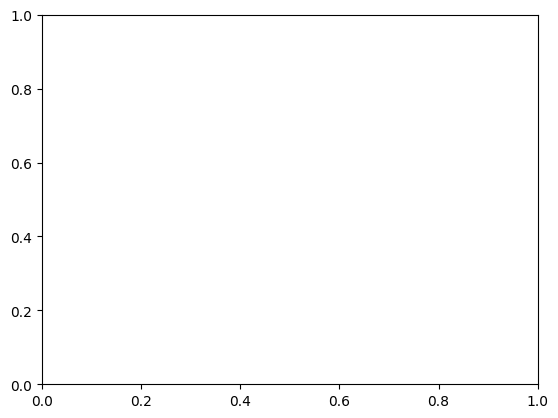

In [5]:
currentTrial = 109
num_trials = 1
duration = None
currentTrial, num_trials, duration = specific_utils.find_currentTrial_or_num_trials_or_duration(ff_caught_T_new, currentTrial, num_trials, duration)

k = 3
fig, ax = plt.subplots()
num_frames, anim_monkey_info, flash_on_ff_dict, alive_ff_dict, believed_ff_dict, new_num_trials, ff_dataframe_anim\
            = animation_utils.prepare_for_animation(ff_dataframe, ff_caught_T_new, ff_life_sorted, ff_believed_position_sorted, 
                                    ff_real_position_sorted, ff_flash_sorted, monkey_information, k=k, currentTrial=currentTrial, num_trials=num_trials)
print("Number of frames is:", num_frames)

In [6]:
fig = plt.figure(figsize=(14.5, 7))
animation_plot_kwargs['hitting_arena_edge_ok'] = True
animation_plot_kwargs['show_connect_path_ff'] = True
animation_plot_kwargs['trial_too_short_ok'] = True
axes = fig.add_subplot(1, 2, 1)
# axes.remove()
returned_info = plot_trials.PlotTrials(duration, 
                        fig=fig,
                        axes=axes,
                        *PlotTrials_args,
                        **animation_plot_kwargs,
                        currentTrial = currentTrial,
                        num_trials = num_trials,           
                        )
axes = returned_info['axes']
fig.add_axes(axes)
ax = fig.add_subplot(1, 2, 2)
fig.tight_layout()
num_frames, anim_monkey_info, flash_on_ff_dict, alive_ff_dict, believed_ff_dict, new_num_trials, ff_dataframe_anim\
            = animation_utils.prepare_for_animation(ff_dataframe, ff_caught_T_new, ff_life_sorted, ff_believed_position_sorted, 
                                    ff_real_position_sorted, ff_flash_sorted, monkey_information, k=k, currentTrial=currentTrial, num_trials=num_trials)
print("Number of frames is:", num_frames)

currentTrial: 109 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  109
duration: [np.float64(295.167344), np.float64(299.582228)]
(14, 3)
Number of frames is: 89


### make animation

In [7]:
#plt.rcParams['animation.ffmpeg_path'] = shutil.which("ffmpeg")
animate_func = partial(animation_func.animate, ax=ax, anim_monkey_info=anim_monkey_info, ff_dataframe_anim=ff_dataframe_anim, \
                       flash_on_ff_dict=flash_on_ff_dict, alive_ff_dict=alive_ff_dict, believed_ff_dict=believed_ff_dict, margin = 400,
                       plot_eye_position=True, set_xy_limits=True)
anim = animation.FuncAnimation(fig, animate_func, frames=num_frames, interval=100, repeat=True) 
HTML(anim.to_html5_video())

2025-09-15 20:40:39,226 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-09-15 20:40:39,227 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1450x700 -pix_fmt rgba -framerate 10.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/81/249hbjx960s5t_1dxgdxz6r00000gn/T/tmp07m98tot/temp.m4v


In [ ]:

num_trials = 1
category = visible_before_last_one_trials
category = category[category > num_trials]
category_name = 'visible_before_last_one'




if len(category) > 0:
    for currentTrial in category[:trial_total_num]:
        with general_utils.initiate_plot(7, 7, 100):
            duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]

            plot_trials.PlotTrials(duration, 
                        *PlotTrials_args,
                        **classic_plot_kwargs,
                        currentTrial = currentTrial,
                        num_trials = num_trials,                                  
                        show_connect_path_ff_except_targets = True,
                        show_path_when_target_visible = True,
                        )

            plt.show()  
            


temp_animation_plot_kwargs = animation_plot_kwargs.copy()
#temp_animation_plot_kwargs['show_connect_path_ff_except_targets'] = True
temp_animation_plot_kwargs['show_path_when_target_visible'] = True
data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None, dt=0.016)
HTML(data_item.anim.to_html5_video())




### make animation with annotation

Make sure that prepare_for_animation has been run first

In [ ]:
reload(animation_func)

In [ ]:

annotation_info = animation_utils.make_annotation_info(caught_ff_num+1, max_point_index, data_item.n_ff_in_a_row, data_item.visible_before_last_one_trials, data_item.disappear_latest_trials, \
                                        data_item.ignore_sudden_flash_indices, data_item.give_up_after_trying_indices, data_item.try_a_few_times_indices)
animate_annotated_func = partial(animation_func.animate_annotated, ax=ax, anim_monkey_info=anim_monkey_info, margin=100, ff_dataframe_anim=ff_dataframe_anim, \
                                   flash_on_ff_dict=flash_on_ff_dict, alive_ff_dict=alive_ff_dict, believed_ff_dict=believed_ff_dict, ff_caught_T_new=ff_caught_T_new, annotation_info=annotation_info)
anim_annotated = animation.FuncAnimation(fig, animate_annotated_func, frames=num_frames, interval=100, repeat=True) 
HTML(anim_annotated.to_html5_video())

## Polar

In [ ]:
currentTrial = 101
num_trials = 1
filename = f"Trials {currentTrial-num_trials+1}-{currentTrial}"
print(filename)
k = 3
rmax = 100
colors_Reds = plt.get_cmap("Reds")(np.linspace(0,1,101))
colors_YlGn = plt.get_cmap("YlGn")(np.linspace(0,1,101))
cum_pos_index = np.where((monkey_information['time'] > ff_caught_T_new[currentTrial-num_trials]) & 
                       (monkey_information['time'] <= ff_caught_T_new[currentTrial]))

if len(cum_pos_index) > 0:
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    ax = plot_behaviors_utils.set_polar_background_for_animation(ax, rmax)

    ff_in_time_frame, ff_visible, ff_in_memory = animation_func.subset_ff_dataframe(ff_dataframe, currentTrial, num_trials)
    anim_indices = cum_pos_index[0][0:-1:k]
    num_frames = anim_indices.size
    animate_func = partial(animation_func.animate_polar, ax=ax, anim_indices=anim_indices, rmax=400, ff_in_time_frame=ff_in_time_frame, ff_visible=ff_visible, ff_in_memory=ff_in_memory)
    anim = animation.FuncAnimation(fig, animate_func, frames=num_frames, interval=int(16.5*k), repeat=True) 

    #gif_dir = '/content/gdrive/My Drive/fireflies_anim/???'
    #anim.save(f"{gif_dir}/{filename}.gif", writer='pillow', fps=60)
else:
    print("Please try another number for currentTrial, or increase num_trials.")



In [ ]:
# For some reason, I need to run the following in a separate cell; I can't combine it with the previous cell.
print("Number of frames is", num_frames)
HTML(anim.to_html5_video())

# Other distributions

## Stop speeds

In [ ]:
all_min_speed = []
all_min_dw = []
all_corr_dw = []
for time in ff_caught_T_new:
  duration = [time-0.5, time+0.5]
  cum_pos_index = np.where((monkey_information['time'] >= duration[0]) & (monkey_information['time'] <= duration[1]))[0]
  cum_t, cum_angle = np.array(monkey_information['time'].iloc[cum_pos_index]), np.array(monkey_information['monkey_angle'].iloc[cum_pos_index])
  cum_mx, cum_my = np.array(monkey_information['monkey_x'].iloc[cum_pos_index]), np.array(monkey_information['monkey_y'].iloc[cum_pos_index])
  cum_speed, cum_speeddummy = np.array(monkey_information['speed'].iloc[cum_pos_index]), np.array(monkey_information['monkey_speeddummy'].iloc[cum_pos_index])
  cum_dw = np.array(monkey_information['ang_speed'].iloc[cum_pos_index])
  min_speed = min(cum_speed)
  corresponding_dw = cum_dw[cum_speed==min_speed]
  all_min_speed.append(min_speed)
  all_min_dw.append(min(np.abs(cum_dw)))
  all_corr_dw.append(round(abs(corresponding_dw).item(), 4))

In [ ]:
import seaborn as sns
fig = plt.subplots()
sns.histplot(all_min_speed)
plt.title("Distribution of min speed around catching targets")
plt.show()



In [ ]:
fig = plt.subplots()
sns.histplot(all_min_dw)
plt.title("Distribution of min abs dw around catching targets")
plt.show()


In [ ]:
fig = plt.subplots()
sns.histplot(all_corr_dw, binwidth=0.0002)
plt.title("Distribution of abs dw corresponding to min speed around catching targets")
plt.xlim(0, 0.004)
plt.show()


## All ff in a session

In [ ]:
with general_utils.initiate_plot(7, 7, 100):
    plt.scatter(ff_real_position_sorted[:,0], ff_real_position_sorted[:,1], s=10)
    plt.show()
    

## ff distribution over time

In [ ]:
plot_behaviors_utils.plot_ff_distribution_in_arena(ff_real_position_sorted, ff_life_sorted, ff_caught_T_new, images_dir=None)

# Appendix

## Retrieve more data

In [ ]:
all_trial_features_lstm = pd.read_csv('RL_models/LSTM_stored_models/all_agents/LSTM_Aug_1_24/patterns_and_features/all_trial_features.csv')
all_trial_features_valid_lstm = all_trial_features_lstm[(all_trial_features_lstm['t_last_vis']<50) & (all_trial_features_lstm['hitting_arena_edge']==False)].reset_index()
median_values_lstm = all_trial_features_valid_lstm.median(axis=0)

# Appendix of categories

## Cluster around targets

In [ ]:
# category = cluster_around_target_trials
# category = category[category > num_trials]
# category_name = 'cluster_around_target'
# num_trials = 1


# if len(category) > 0:
#   with general_utils.initiate_plot(7, 7, 100):
#     for currentTrial in category[:trial_total_num]:
#         duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
#         plot_trials.PlotTrials(duration, 
#                    *PlotTrials_args,
#                    **classic_plot_kwargs,
#                    currentTrial = currentTrial,
#                    num_trials = num_trials,                   
#                    trail_color_var = "speed",
#                    show_path_when_target_visible = True,
#                    show_connect_path_ff = True,
#                    trial_to_show_cluster_around_target = "current",                 
#                    )

#         temp_animation_plot_kwargs = animation_plot_kwargs.copy()
#         temp_animation_plot_kwargs['trial_to_show_cluster_around_target'] = 'current'
#         data_item.make_animation(currentTrial=currentTrial, num_trials=num_trials, animation_plot_kwargs=temp_animation_plot_kwargs, save_video=False, video_dir=None, file_name=None)
        

#         plt.show()  
#         


## Cluster of fireflies

In [ ]:
# category = cluster_exist_trials
# category = category[category > num_trials]
# category_name = 'cluster_exist_trials'
# num_trials = 1

# if len(category) > 0:
#   with general_utils.initiate_plot(7, 7, 100):
#     for currentTrial in category[:trial_total_num]:
#         duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
        
#         plot_trials.PlotTrials(duration, 
                  #  *PlotTrials_args,
                  #  **classic_plot_kwargs,
                  #  currentTrial = currentTrial,
                  #  num_trials = num_trials,                   
#                    trail_color_var = "speed",                 
#                    show_path_when_target_visible = True,
#                    show_connect_path_ff_except_targets = True,
#                    trial_to_show_cluster = "current", 
#                    cluster_dataframe_point = cluster_dataframe_point,
#                    
#                    )

#         plt.show()  
#         


## Waste cluster

In [ ]:
# category = waste_cluster_trials
# category = category[category > num_trials]
# category_name = 'waste_cluster_trials'
# num_trials = 2

# if len(category) > 0:
#   with general_utils.initiate_plot(7, 7, 100):
#     for currentTrial in category[:trial_total_num]:
#         duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
        
#         plot_trials.PlotTrials(duration, 
                  #  *PlotTrials_args,
                  #  **classic_plot_kwargs,
                  #  currentTrial = currentTrial,
                  #  num_trials = num_trials,
#                    show_connect_path_ff = True,
#                    trial_to_show_cluster = "previous", 
#                    cluster_dataframe_point = cluster_dataframe_point
#                    
#                    )

#         plt.show()  
#         


# Debug

In [ ]:
!pip install -Uqq ipdb
import ipdb
%pdb on

In [ ]:
%pdb off